In [1]:
import pickle
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import pandas.plotting

In [2]:
#Read the whole dataset ( which is in pikcle format for each tokenized translation file ) into a dictionary
movies_dic = {
   "rating" : [],
   "movie_words" : []
}

for file_name in os.listdir("./pickle_files_1"):
    rating = file_name.split("_")[0]
    pickle_object = open("./pickle_files_1/" + file_name, "rb")
    movie_dic = pickle.load(pickle_object)
    sentence_list = [movie_dic[key] for key in movie_dic.keys()]
    word_list = []
    
    for sentence in sentence_list:    
        word_list = word_list + sentence
        
    if rating == "G" or rating == "PG" or rating == "PG-13" or rating == "R" or rating == "NC-17":
        movies_dic["rating"].append(rating)
        movies_dic["movie_words"].append(word_list)
    else: 
        #Any film without rating, or rated with different rating system
        #or even a series(We foucs just on films right now) will be considered "OTHER"
        movies_dic["rating"].append("OTHER")       
        movies_dic["movie_words"].append(word_list)

In [3]:
#imorting the data into Pandas DataFrame
movies_table = pd.DataFrame(movies_dic)

print(movies_table.head())

  rating                                        movie_words
0      R  [time, get, back, vermont, wan, na, know, wort...
1      G  [sir, main, level, please, right, see, way, ba...
2     PG  [looks, like, paradise, fact, treacherous, des...
3  PG-13  [damn, fighters, going, gone, chasing, scalps,...
4  PG-13  [unbelievable, look, city, like, world, never,...


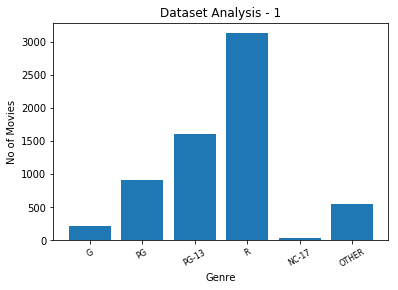

In [4]:
#calcuate the total film number
film_count = (len(movies_table.index) + 1)

#calcuate the total film number for each rating categorey
G_number = len(movies_table.loc[movies_table["rating"] == "G"])
PG_number = len(movies_table.loc[movies_table["rating"] == "PG"])
PG_13_number = len(movies_table.loc[movies_table["rating"] == "PG-13"])
R_number = len(movies_table.loc[movies_table["rating"] == "R"])
NC_17_number = len(movies_table.loc[movies_table["rating"] == "NC-17"])
OTHER_number = len(movies_table.loc[movies_table["rating"] == "OTHER"])

#Plot the movies number against their rating
plt.bar(np.arange(6),[G_number, PG_number, PG_13_number, R_number, NC_17_number, OTHER_number])
plt.xlabel('Genre', fontsize=10)
plt.ylabel('No of Movies', fontsize=10)
plt.xticks(np.arange(6), ["G", "PG", "PG-13","R","NC-17","OTHER"], fontsize=8, rotation=30)
plt.title('Dataset Analysis - 1')

plt.savefig("Dataset Analysis-1.png")

In [5]:
#Calcuate the frequency of words for each rating categorey

def calcuate_word_frequency(movies_table, rating):
    rated_movies_table = movies_table.loc[movies_table["rating"] == rating]["movie_words"]
    movies_word_list = []
    for index in rated_movies_table.index:
        movies_word_list = movies_word_list + rated_movies_table[index]

    movies_word_Series = pd.Series(movies_word_list)
    movies_words_frequency = movies_word_Series.value_counts()
    
    return movies_words_frequency


print(calcuate_word_frequency(movies_table, "G"))


oh                 7498
get                6025
know               5857
go                 5689
well               5515
like               5369
come               5345
right              5234
one                4879
got                4667
see                4011
yes                3767
good               3746
let                3742
think              3258
look               3079
yeah               3072
would              3000
time               2962
back               2957
hey                2923
us                 2877
going              2783
little             2739
na                 2702
ca                 2589
could              2588
want               2546
take               2542
way                2483
                   ... 
horribleness          1
rahan                 1
commodity             1
electroshock          1
scorch                1
elaine                1
basing                1
widened               1
incentive             1
pretzels              1
scathing        

In [6]:
#Delete most frequent n words
def delete_most_frequent(movies_table, rating, n):
    top_words = calcuate_word_frequency(movies_table, rating)
    top_10_words = set(top_words.head(n).keys().tolist())
    
    new_words = []
    
    
    for words_list in movies_table[movies_table["rating"] == rating]["movie_words"]:
        new_words_list = [i for i in words_list if not i in top_10_words]
        new_words.append(new_words_list)
    
    movies_table.loc[movies_table["rating"] == rating,"movie_words"] = new_words.copy()
    
       
delete_most_frequent(movies_table, "G", 20)
delete_most_frequent(movies_table, "PG", 20)
delete_most_frequent(movies_table, "PG-13", 20)
delete_most_frequent(movies_table, "R", 20)
delete_most_frequent(movies_table, "NC-17", 20)

In [7]:
#Delete words with count equal to "count"
def delete_rare_words(movie_table, rating, count):
    freq = calcuate_word_frequency(movies_table, rating).to_dict()
    rare_words_list = {key for key in freq.keys() if freq[key] == count}
    
    new_words = []
    
    for words_list in movies_table[movies_table["rating"] == rating]["movie_words"]:
        new_words_list = [i for i in words_list if not i in rare_words_list]
        new_words.append(new_words_list)
    
    movies_table.loc[movies_table["rating"] == rating,"movie_words"] = new_words.copy()
    
delete_rare_words(movies_table, "G", 1)
delete_rare_words(movies_table, "PG", 1)
delete_rare_words(movies_table, "PG-13", 1)
delete_rare_words(movies_table, "R", 1)
delete_rare_words(movies_table, "NC-17", 1)

In [8]:
# calcuate the word frequency for each rating categorey after the changes
G_frequency = calcuate_word_frequency(movies_table, "G")
PG_frequency = calcuate_word_frequency(movies_table, "PG")
PG_13_frequency = calcuate_word_frequency(movies_table, "PG-13")
R_frequency = calcuate_word_frequency(movies_table, "R")
NC_17_frequency = calcuate_word_frequency(movies_table, "NC-17")


In [9]:
#Display the most frequent 20 words for each rating
top_words_dic = {
    "rating" : ["G", "PG", "PG-13", "R", "NC-17"],
    "top_10_words" : []
}

top_words_dic["top_10_words"].append(G_frequency.head(20).keys().tolist())
top_words_dic["top_10_words"].append(PG_frequency.head(20).keys().tolist())
top_words_dic["top_10_words"].append(PG_13_frequency.head(20).keys().tolist())
top_words_dic["top_10_words"].append(R_frequency.head(20).keys().tolist())
top_words_dic["top_10_words"].append(NC_17_frequency.head(20).keys().tolist())


top_words_table = pd.DataFrame(top_words_dic)
pd.set_option('display.max_colwidth', -1)
display(top_words_table)

#save the table as html format
top_words_table.to_html('top_words_table.html')

,rating,top_10_words
0,G,"[hey, us, going, little, na, ca, could, want, take, way, say, never, gon, tell, man, okay, make, sir, something, really]"
1,PG,"[back, gon, look, would, time, going, us, could, take, man, ca, little, way, say, really, tell, never, something, make, thank]"
2,PG-13,"[back, would, going, man, look, us, time, yes, take, could, ca, need, really, say, tell, way, something, sorry, make, never]"
3,R,"[see, back, going, look, would, take, fuck, time, us, yes, ca, fucking, could, tell, really, shit, need, say, something, god]"
4,NC-17,"[well, look, love, yes, ca, fuck, going, could, really, fucking, take, tell, back, man, say, us, little, something, time, mean]"


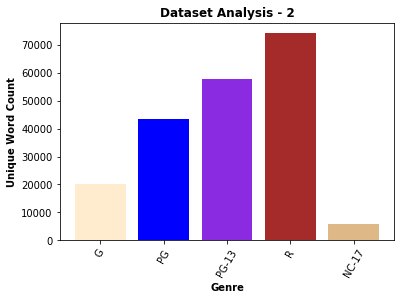

In [10]:
#Plot the unique word count for each rating
rating_categories = ["G", "PG", "PG-13", "R", "NC-17"]

G_movies_words_count = len(G_frequency)
PG_movies_words_count = len(PG_frequency)
PG_13_movies_words_count = len(PG_13_frequency)
R_movies_words_count = len(R_frequency)
NC_17_movies_words_count = len(NC_17_frequency)

colors = [name for name,hex in matplotlib.colors.cnames.items()]
bars_colors = colors[8:13]

plt.bar(np.arange(len(rating_categories)),[G_movies_words_count, PG_movies_words_count,PG_13_movies_words_count, R_movies_words_count, NC_17_movies_words_count], color= bars_colors)
plt.xlabel('Genre', fontsize=10, fontweight = "bold")
plt.ylabel('Unique Word Count', fontsize=10, fontweight = "bold")
plt.xticks(np.arange(len(rating_categories)),rating_categories, fontsize=10, rotation=60)
plt.title('Dataset Analysis - 2', fontweight = "bold")
                                           
plt.savefig("Dataset Analysis-2.png")

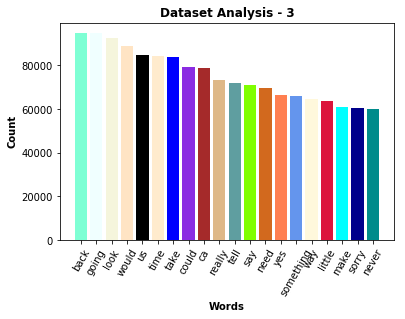

In [11]:
#Plot the histogram for the most frequent 20 words for the whole corpus
movies_words = []
for rating in rating_categories:
    rated_movies_table = movies_table.loc[movies_table["rating"] == rating]["movie_words"]
    for index in rated_movies_table.index:
        movies_words = movies_words + rated_movies_table[index]
        
movies_words = pd.Series(movies_words)
movies_words_frequency = movies_words.value_counts()
movies_words_top_20 = movies_words_frequency.head(20)

movies_words_top_20 = movies_words_top_20.to_dict()

movies_top_20_words = movies_words_top_20.keys()  
movies_top_20_frequecies = movies_words_top_20.values()

bars_colors = colors[3:23]

plt.bar(np.arange(len(movies_top_20_words)), movies_top_20_frequecies, color= bars_colors)
plt.xlabel('Words', fontsize=10, fontweight = "bold")
plt.ylabel('Count', fontsize=10, fontweight = "bold")
plt.xticks(np.arange(len(movies_top_20_words)),movies_top_20_words, fontsize=10, rotation=60)
plt.title('Dataset Analysis - 3', fontweight = "bold")

plt.savefig("Dataset Analysis-3.png")

In [56]:
#Count the common words accros categories and print its percentage to the total unique words
total_unique_words = set(movies_words_frequency.keys().tolist())
G_unique_words = set(G_frequency.keys().tolist())
PG_uique_words = set(PG_frequency.keys().tolist())
PG_13_unique_words = set(PG_13_frequency.keys().tolist())
R_unique_words = set(R_frequency.keys().tolist())
NC_17_unique_words = set(NC_17_frequency.keys().tolist())


postive_words = G_unique_words | PG_uique_words | PG_13_unique_words

negative_words = R_unique_words | NC_17_unique_words

print("Postive words count : " , len(postive_words))
print("Negative words count : " ,len(negative_words))

common_words = negative_words.intersection(postive_words)

print("Common words count : " , len(common_words))

print ("Percentage of the common words" ,len(common_words) / len(total_unique_words)  * 100, "%")


Postive words count :  70125
Negative words count :  74396
Common words count :  47112
Percentage of the common words 48.3651407980782 %


In [22]:
with open("dataset.picle", "wb") as output:
    pickle.dump(movies_table.to_dict, )